These Render Helper Tools facilitate the creation of simple sketches.

Currently this is limited to the default and OpenGL renderers (P2D and P3D). I would like to add support for other renderers such as SVG at a later date.

In [1]:
from IPython.display import display

import py5

# Making a Single Image

Below is an introductory example showing how to make a single image.

The first parameter, `s: py5.Sketch`, includes a typehint. The typehint makes tab completion provide the right fields and methods, simplifying development.

In [2]:
def draw_square(s: py5.Sketch):
    s.background(240)
    s.rect_mode(s.CENTER)
    s.fill(255, 0, 0)
    s.rect(s.width / 2, s.height / 2, 50, 50)

Pass the newly created `draw_square` function to [render_frame()](link://slug/render_frame). It will render a single frame sketch with a width and height of `200, 200`. The result is returned as a [PIL Image object](https://pillow.readthedocs.io/en/stable/index.html).

In [3]:
img = py5.render_frame(draw_square, 200, 200)

print(type(img))

<class 'PIL.Image.Image'>


Here's what that image looks like:

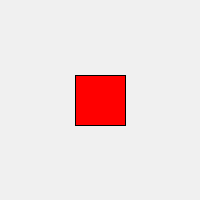

In [4]:
img

Next, add some parameters to `draw_square` to parameterize the output.

In [5]:
def draw_square(s: py5.Sketch, fill_color, square_size):
    s.background(240)
    s.rect_mode(s.CENTER)
    s.fill(*fill_color)
    s.rect(s.width / 2, s.height / 2, square_size, square_size)

Below, use the new `draw_square` function with [render_frame()](link://slug/render_frame). Arguments are passed to `draw_square` via [render_frame()](link://slug/render_frame)'s `draw_kwargs` parameter.

You can pass positional arguments with `draw_args` but I think using keyword arguments is easier and more readable.

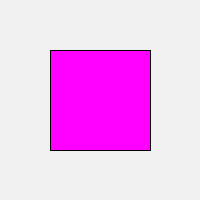

In [6]:
img = py5.render_frame(draw_square, 200, 200,
                       draw_kwargs=dict(fill_color=(255, 0, 255), square_size=100))

img

[render()](link://slug/render) is the [decorator](https://realpython.com/primer-on-python-decorators/) equivalent for [render_frame()](link://slug/render_frame). I think it achieves cleaner results, particularly when passing function arguments.

When using decorators, don't forget the `@` sign, like I just did while writing this documentation.

In [7]:
@py5.render(200, 200)
def draw_square(s: py5.Sketch, fill_color, square_size):
    s.background(240)
    s.rect_mode(s.CENTER)
    s.fill(*fill_color)
    s.rect(s.width / 2, s.height / 2, square_size, square_size)

Now you have an easy to use function that outputs images using the passed parameter values.

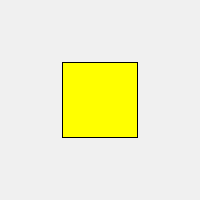

In [8]:
draw_square((255, 255, 0), 75)

You can make this more interesting with default arguments and the OpenGL renderer.

In [9]:
@py5.render(200, 200, py5.P2D)
def draw_square(s: py5.Sketch, fill_color, square_size=50):
    s.background(240)
    s.rect_mode(s.CENTER)
    s.fill(*fill_color)
    s.rect(s.width / 2, s.height / 2, square_size, square_size)

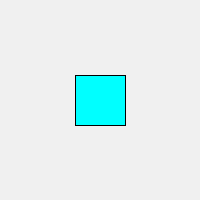

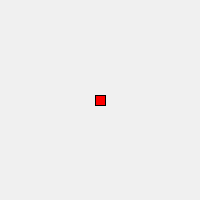

In [10]:
img1 = draw_square((0, 255, 255))
img2 = draw_square((255, 0, 0), square_size=10)

display(img1, img2)

Finally, apply what you've learned to make a more interesting example.

In [11]:
@py5.render(400, 100)
def draw_message(s: py5.Sketch, message, color=(255,)):
    s.background(0)
    s.text_size(40)
    s.text_align(s.CENTER, s.CENTER)
    s.fill(*color)
    s.text(message, s.width / 2, s.height / 2)

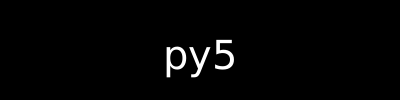

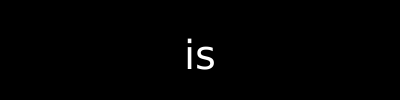

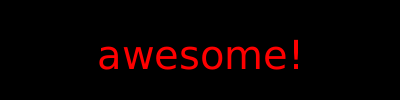

In [12]:
msg1 = draw_message('py5')
msg2 = draw_message('is')
msg3 = draw_message('awesome!', color=(255, 0, 0))

display(msg1, msg2, msg3)

Assembling that into an animated GIF is easy with the PIL Image library.

In [13]:
msg1.save('images/render_helper/py5_is_awesome.gif',
          save_all=True, duration=500, loop=0, append_images=[msg2, msg3])

Here is the animated GIF:

![py5 is awesome](images/render_helper/py5_is_awesome.gif)

# Making a Series of Images

The Render Helper Tools can also create a sequence of images for an animation of some kind.

In [14]:
def draw_cubes(s: py5.Sketch, cube_size=50):
    s.background(255)
    s.no_fill()
    s.translate(s.width / 2, s.height / 2, 50)
    s.rotate_y(s.HALF_PI * s.frame_count / 10)
    s.box(cube_size)

Pass the `draw_cubes` function to [render_frame_sequence()](link://slug/render_frame_sequence) to return a list of [PIL Image object](https://pillow.readthedocs.io/en/stable/index.html).

In [15]:
cubes = py5.render_frame_sequence(draw_cubes, 200, 200, py5.P3D, limit=10)

cubes

[<PIL.Image.Image image mode=RGB size=200x200 at 0x7FF4A4755AC0>,
 <PIL.Image.Image image mode=RGB size=200x200 at 0x7FF4A47664F0>,
 <PIL.Image.Image image mode=RGB size=200x200 at 0x7FF4A4766BE0>,
 <PIL.Image.Image image mode=RGB size=200x200 at 0x7FF418043580>,
 <PIL.Image.Image image mode=RGB size=200x200 at 0x7FF418043D60>,
 <PIL.Image.Image image mode=RGB size=200x200 at 0x7FF418043D90>,
 <PIL.Image.Image image mode=RGB size=200x200 at 0x7FF418043070>,
 <PIL.Image.Image image mode=RGB size=200x200 at 0x7FF418043EE0>,
 <PIL.Image.Image image mode=RGB size=200x200 at 0x7FF4A47777C0>,
 <PIL.Image.Image image mode=RGB size=200x200 at 0x7FF4A4777880>]

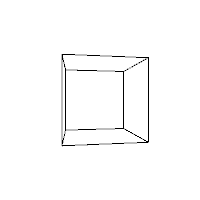

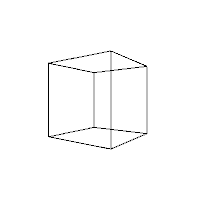

In [16]:
display(cubes[0], cubes[5])

As before, a decorator is available. [render_sequence()](link://slug/render_sequence) is the decorator equivalent of [render_frame_sequence()](link://slug/render_frame_sequence).

In [17]:
@py5.render_sequence(200, 200, py5.P3D, limit=10)
def draw_cubes(s: py5.Sketch, cube_size=50):
    s.no_fill()
    s.background(255)
    s.translate(s.width / 2, s.height / 2, 50)
    s.rotate_y(s.HALF_PI * s.frame_count / 10)
    s.box(cube_size)

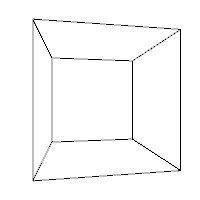

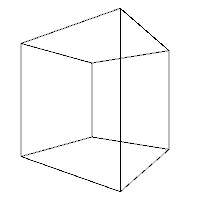

In [18]:
cubes = draw_cubes(75)

display(cubes[0], cubes[5])

Normally py5 sketches have a `setup()` method that is run once at the beginning of the animation. This method might be used to configure fill and stroke settings that should apply for every frame of the animation. You could leave those kinds of commands in the `draw_cubes()` function, but it might be nice to be able to break it out into a seperate `cube_setup()` function, like so:

In [19]:
def cube_setup(s: py5.Sketch):
    s.no_fill()
    s.stroke_weight(3)

@py5.render_sequence(200, 200, py5.P3D, limit=10, setup=cube_setup)
def draw_cubes(s: py5.Sketch, cube_size=50):
    s.background(255)
    s.translate(s.width / 2, s.height / 2, 50)
    s.rotate_y(s.HALF_PI * s.frame_count / 10)
    s.box(cube_size)

Now use the `draw_cubes` function and create an animated GIF.

In [20]:
cubes = draw_cubes(75)

first_cube = cubes[0]
first_cube.save('images/render_helper/rotating_cube.gif',
                save_all=True, duration=100, loop=0, append_images=cubes[1:])

Here is the GIF:

![rotating cube](images/render_helper/rotating_cube.gif)

In the previous example the [frame_count](link://slug/frame_count) field was used to drive the animation, rotating the cube by a different angle in each frame. It worked well, but it might not always be easy or convenient to link changing animation state to [frame_count](link://slug/frame_count). An alternative approach is to use the Python `global` keyword.

Below is the same example as before, but without depending on [frame_count](link://slug/frame_count).

In [21]:
rot_y = 0

@py5.render_sequence(200, 200, py5.P3D, limit=10, setup=cube_setup)
def draw_cubes(s: py5.Sketch, cube_size=50):
    s.background(255)
    s.translate(s.width / 2, s.height / 2, 50)
    # rot_y gets updated with each frame, changing the state
    global rot_y
    rot_y += s.HALF_PI / 10
    s.rotate_y(rot_y)
    s.box(cube_size)

In [22]:
cubes = draw_cubes(75)

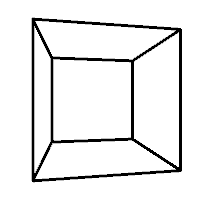

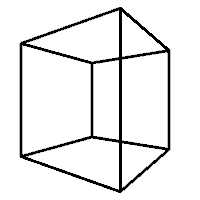

In [23]:
display(cubes[0], cubes[5])

# A Caveat

In both Processing and py5 it is unwise or impossible to run a sketch inside of another sketch.

These Render Helper Tools are creating and running sketches to provide their functionality. Although you might be tempted to do so, I do not recommend you use them in any way that places them inside of another running sketch.